# EDA to determine the lifestyle conditions influencing the math score of the students

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')
display(stud_math.head(10))
stud_math.info()


# function to check non digit colomns with data: how many NaNs, and how many different values)


def check_non_digit(x):
    print(x.isnull().sum(), 'empty lines in the column')
    print(x.value_counts())
    print(len(x), 'Total numbers')


# function to check for outliers


def check_for_out(x):
    IQR = x.quantile(0.75) - x.quantile(0.25)
    perc25 = x.quantile(0.25)
    perc75 = x.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    x.loc[x.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
          ].hist(bins=10, range=(0, 10), label='IQR')
    plt.legend()

    # function to build the boxplots


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math, ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Looking at the data info:
1) There are some columns with Null data. for example there are only 378 addresses in the data set insrtead of 395 (total number of entries)

2) There are some data as text (object) and digital (float 64 and int 64)

3) #20 studytime, granular - is better to rename



1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

<AxesSubplot:>

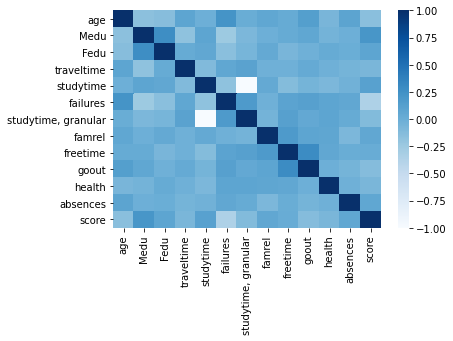

In [2]:
sns.heatmap(stud_math.corr(), cmap='Blues')

Look at the graph: Studytime, granular and studytime shows negative correlation -1. We can remove one.

In [3]:
# rename of th Column#20

stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud_math.columns = (['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                      'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                      'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                      'granular', 'higher', 'internet', 'romantic', 'famrel',
                      'freetime', 'goout', 'health', 'absences', 'score'])

# Checked for correlation, the column shows the same as studytime.
stud_math.drop(['granular'], inplace=True, axis=1)

## Primary data analysis

Let's look thru the columns one by one:

### 1 school — аббревиатура школы, в которой учится ученик

In [5]:
check_non_digit(stud_math.school)

0 empty lines in the column
GP    349
MS     46
Name: school, dtype: int64
395 Total numbers


There are only TWO schools in the dataset. 0 empty lines

### 2 sex — пол ученика ('F' - женский, 'M' - мужской) - Category

In [6]:
check_non_digit(stud_math.sex)

0 empty lines in the column
F    208
M    187
Name: sex, dtype: int64
395 Total numbers


Zero empty lines. Two types of sex in the answers. Data is ok.


### 3 age — возраст ученика (от 15 до 22) - numerical column.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

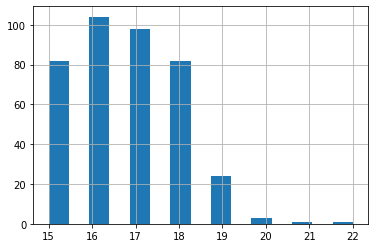

In [7]:
stud_math.age.hist(bins=15)
stud_math.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


<AxesSubplot:>

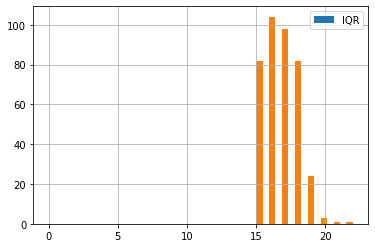

In [8]:
check_for_out(stud_math.age)  # check for outliers in the numeric column
stud_math.age.hist(bins=15)

Age data out of 13.0 .. 21.0 can be removed. Ingeneral it is possible to have a kid of 22 at school??? or even 21 or 20?????

<AxesSubplot:>

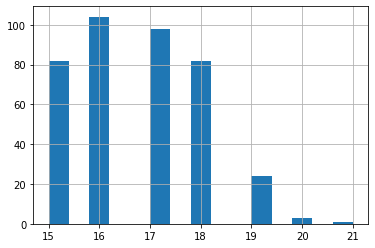

In [9]:
perc25 = stud_math.age.quantile(0.25)
perc75 = stud_math.age.quantile(0.75)
IQR = perc75-perc25
stud_math = stud_math.loc[stud_math.age.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_math.age.hist(bins=15)

it looks like there are 4 students 20 years and older. In general age distribution looks ok. Removed data 22 years old

### 4 address — тип адреса ученика ('U' - городской, 'R' - за городом) - categories. 

In [10]:
check_non_digit(stud_math.address)

17 empty lines in the column
U    294
R     83
Name: address, dtype: int64
394 Total numbers


In [11]:
stud_math.address = stud_math.address.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

In [12]:
stud_math[stud_math.address.isnull()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,None,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,None,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,None,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,None,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,None,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,None,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,None,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,None,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
270,GP,F,19,None,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN


All empties were changed to None. Data is ok for further analysis.

### 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3) - categories.

In [13]:
check_non_digit(stud_math.famsize)

27 empty lines in the column
GT3    260
LE3    107
Name: famsize, dtype: int64
394 Total numbers


In [14]:
stud_math.famsize = stud_math.famsize.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

In [15]:
stud_math.famsize.value_counts()

GT3    260
LE3    107
Name: famsize, dtype: int64

Data looks ok in famsize column

### 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)- categories

In [16]:
check_non_digit(stud_math.pstatus)

45 empty lines in the column
T    313
A     36
Name: pstatus, dtype: int64
394 Total numbers


In [17]:
stud_math.pstatus = stud_math.pstatus.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

Data looks ok in pstatus column

### 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

### 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Both columns are digital. We can look at the hists.

<AxesSubplot:>

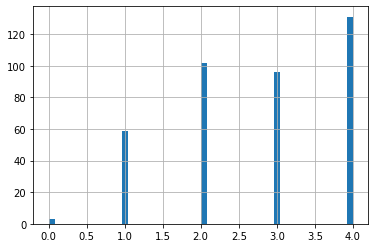

In [18]:
stud_math.medu.hist(bins=50)

<AxesSubplot:>

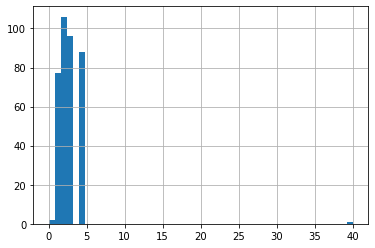

In [19]:
stud_math.fedu.hist(bins=50)

fedu hists shows outlier ---> Based on the information provided in the description, the value can be only within 0 and 4. All other data looks good. We can remove this data from data frame.

In [20]:
# How to drop the lines with unsertain data:
# determine indexes with wrong data
index_names = stud_math[stud_math['fedu'] > 4].index
# use drop method to delet only rows with data out of the scope and common sence
stud_math.drop(index_names, inplace=True)
check_non_digit(stud_math.fedu)

24 empty lines in the column
2.0    106
3.0     96
4.0     88
1.0     77
0.0      2
Name: fedu, dtype: int64
393 Total numbers


<AxesSubplot:>

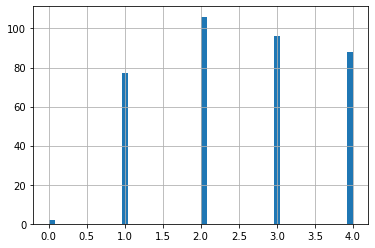

In [21]:
stud_math.fedu.hist(bins=50)  # Checked:

Data for fedu and medu looks good.

### 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

### 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Both columns are categories.

In [22]:
check_non_digit(stud_math.mjob)

19 empty lines in the column
other       133
services     96
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64
393 Total numbers


In [23]:
check_non_digit(stud_math.fjob)

36 empty lines in the column
other       196
services    101
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64
393 Total numbers


There are empty data. Replacement with None is required for further analysis. As this data is not digital.(sounds weird, but NaN is is IEEE 754 floating point representation of Not a Number (NaN), which is of Python build-in numeric type float. However, None is of NoneType and is an object.) As column is an object type, I would prefer to keep the same format. 

In [24]:
stud_math.mjob = stud_math.mjob.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)
stud_math.fjob = stud_math.fjob.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

Data looks good for both colomns

### 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

<AxesSubplot:>

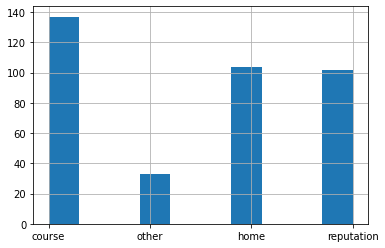

In [25]:
stud_math.reason.hist()

In [26]:
check_non_digit(stud_math.reason)

17 empty lines in the column
course        137
home          104
reputation    102
other          33
Name: reason, dtype: int64
393 Total numbers


In [27]:
stud_math.reason = stud_math.reason.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

Data looks good for further analysis.

### 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [28]:
check_non_digit(stud_math.guardian)

31 empty lines in the column
mother    249
father     85
other      28
Name: guardian, dtype: int64
393 Total numbers


In [29]:
stud_math.guardian = stud_math.guardian.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

<AxesSubplot:>

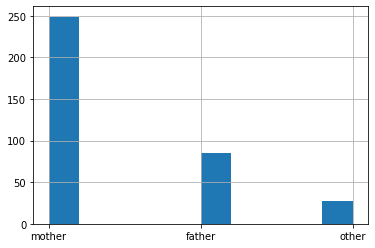

In [30]:
stud_math.guardian.hist()

Looks like some kids are not living with their parents. Also, most of the kids are guarded by their mothers. Data is ok for further analysis.

### 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.

<AxesSubplot:>

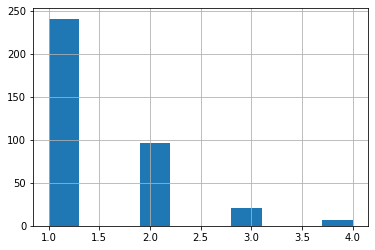

In [31]:
stud_math.traveltime.hist()

In [32]:
check_non_digit(stud_math.traveltime)

28 empty lines in the column
1.0    241
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64
393 Total numbers


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


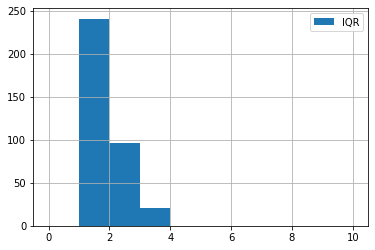

In [33]:
# 4- means more than 60 min, and data is ok,
check_for_out(stud_math.traveltime)
#  no correction is required from the common sence.

data looks good for further analysis. All data are within limits in the description.

###  14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

<AxesSubplot:>

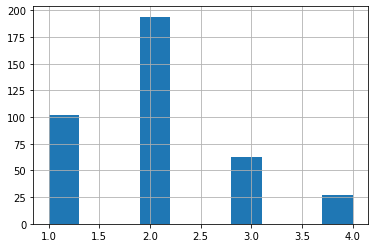

In [34]:
stud_math.studytime.hist()

In [35]:
stud_math.studytime.describe()

count    386.000000
mean       2.038860
std        0.841176
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

studytime data looks ok for further analysis

Data looks ok: (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). There is no outliers , as all data within 0-4. Also ut is very posdible to get into the statistic several people without education.

### 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

<AxesSubplot:>

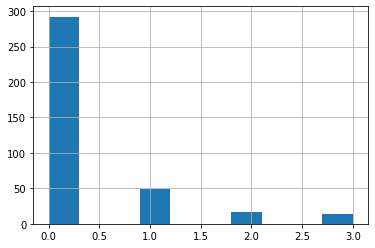

In [36]:
stud_math.failures.hist()

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0). It means that if n = 4,5,6... or n = 0 we will get the same 0. Looks like data can not be truly used for analysis, as there are too many 0 with unclear pre-history. This assumtion can be checked further.

### 16 schoolsup — дополнительная образовательная поддержка (yes или no)

In [37]:
check_non_digit(stud_math.schoolsup)

9 empty lines in the column
no     333
yes     51
Name: schoolsup, dtype: int64
393 Total numbers


In [38]:
stud_math.schoolsup = stud_math.schoolsup.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

### 17 famsup — семейная образовательная поддержка (yes или no)

In [39]:
check_non_digit(stud_math.famsup)

39 empty lines in the column
yes    218
no     136
Name: famsup, dtype: int64
393 Total numbers


In [40]:
stud_math.famsup = stud_math.famsup.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)

Data looks fine.

### 18 paid — дополнительные платные занятия по математике (yes или no)

In [41]:
check_non_digit(stud_math.paid)

40 empty lines in the column
no     198
yes    155
Name: paid, dtype: int64
393 Total numbers


In [42]:
stud_math.paid = stud_math.paid.apply(
    lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)








23 romantic — в романтических отношениях (yes или no)

### 19 activities — дополнительные внеучебные занятия (yes или no)

In [43]:
check_non_digit(stud_math.activities)

14 empty lines in the column
yes    194
no     185
Name: activities, dtype: int64
393 Total numbers


<AxesSubplot:>

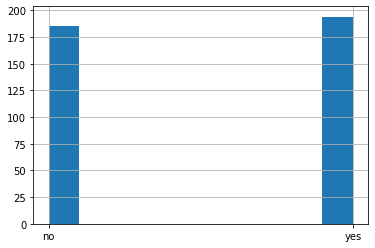

In [44]:
stud_math.activities.hist()

data looks good

### 20 nursery — посещал детский сад (yes или no)

In [45]:
check_non_digit(stud_math.nursery)

16 empty lines in the column
yes    299
no      78
Name: nursery, dtype: int64
393 Total numbers


<AxesSubplot:>

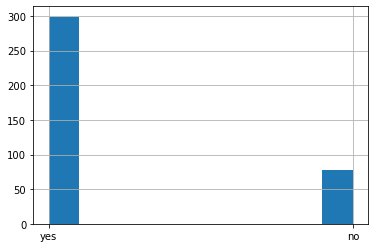

In [46]:
stud_math.nursery.hist()

Data looks fine.

### 21 higher — хочет получить высшее образование (yes или no)

In [47]:
check_non_digit(stud_math.nursery)

16 empty lines in the column
yes    299
no      78
Name: nursery, dtype: int64
393 Total numbers


<AxesSubplot:>

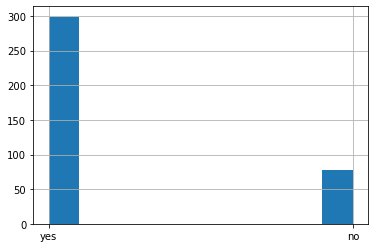

In [48]:
stud_math.nursery.hist()

data looks ok.

### 22 internet — наличие интернета дома (yes или no)

In [49]:
check_non_digit(stud_math.internet)

34 empty lines in the column
yes    303
no      56
Name: internet, dtype: int64
393 Total numbers


<AxesSubplot:>

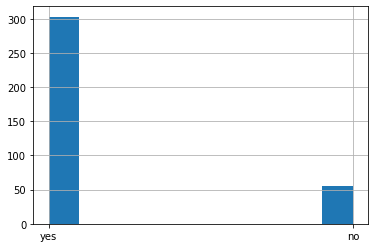

In [50]:
stud_math.internet.hist()

### 23 romantic — в романтических отношениях (yes или no)

In [51]:
check_non_digit(stud_math.romantic)

31 empty lines in the column
no     239
yes    123
Name: romantic, dtype: int64
393 Total numbers


<AxesSubplot:>

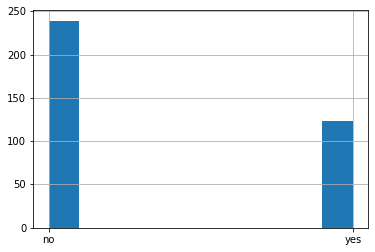

In [52]:
stud_math.romantic.hist()

### 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

<AxesSubplot:>

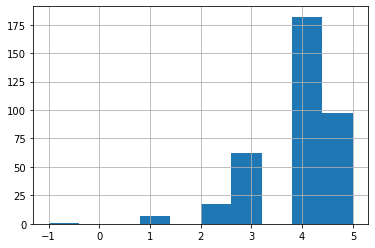

In [53]:
stud_math.famrel.hist()

There is an outliner as data can not be less than 1. This data shall be removed from dataset.

In [54]:
# How to drop the lines with unsertain data:
# determine indexes with wrong data
index_names = stud_math[stud_math['famrel'] < 1].index
# use drop method to delet only rows with data out of the scope and common sence
stud_math.drop(index_names, inplace=True)
check_non_digit(stud_math.famrel)

27 empty lines in the column
4.0    182
5.0     97
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64
392 Total numbers


<AxesSubplot:>

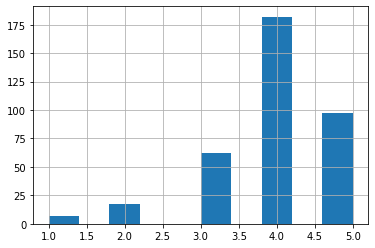

In [55]:
stud_math.famrel.hist()

looks good!

### 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

11 empty lines in the column
3.0    153
4.0    111
2.0     61
5.0     38
1.0     18
Name: freetime, dtype: int64
392 Total numbers


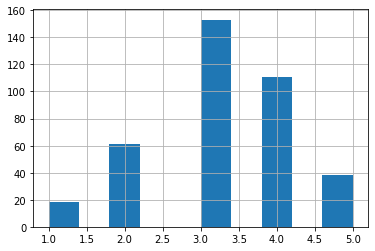

In [56]:
stud_math.freetime.hist()
check_non_digit(stud_math.freetime)

Data looks good.

### 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

8 empty lines in the column
3.0    127
2.0     99
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64
392 Total numbers


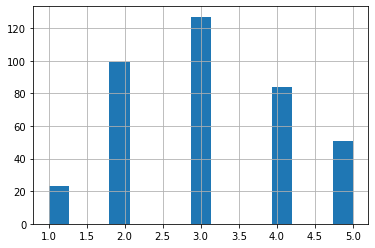

In [57]:
stud_math.goout.hist(bins=15)
check_non_digit(stud_math.goout)

Data looks good

### 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

15 empty lines in the column
5.0    137
3.0     89
4.0     62
1.0     46
2.0     43
Name: health, dtype: int64
392 Total numbers


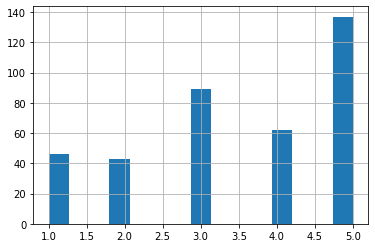

In [58]:
stud_math.health.hist(bins=15)
check_non_digit(stud_math.health)

Data looks ok

### 28 absences — количество пропущенных занятий

count    380.000000
mean       7.247368
std       23.550471
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

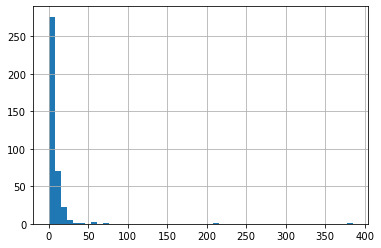

In [59]:
stud_math.absences.hist(bins=50)
stud_math.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


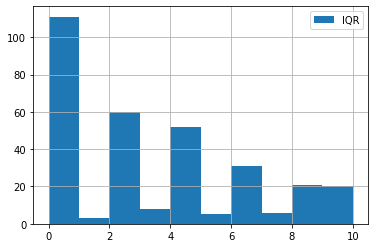

In [60]:
# check for outliers. 385 absences looks weird, as there 365 days in a year and about 180 days in a school year
check_for_out(stud_math.absences)

<AxesSubplot:>

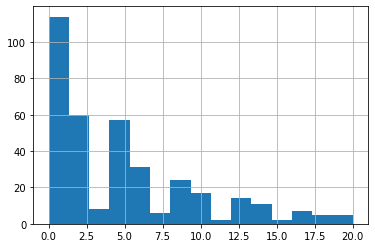

In [61]:
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
IQR = perc75-perc25
stud_math = stud_math.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_math.absences.hist(bins=15)

Data looks good!

### 29 score — баллы по госэкзамену по математике

5 empty lines in the column
50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     28
70.0     27
40.0     24
45.0     23
80.0     16
30.0     14
90.0      9
35.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64
363 Total numbers


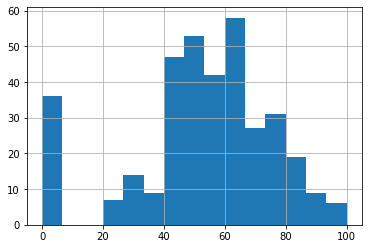

In [62]:
stud_math.score.hist(bins=15)
check_non_digit(stud_math.score)

let's check the data( so many 0s looks weird.)

25-й перцентиль: 41.25, 75-й перцентиль: 70.0, IQR: 28.75,  Границы выбросов: [-1.875, 113.125].


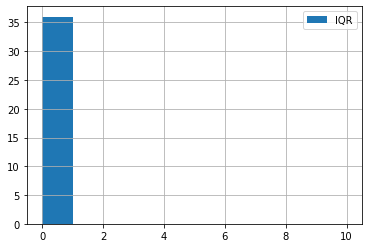

In [63]:
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud_math.score.loc[stud_math.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR')

plt.legend()

<AxesSubplot:>

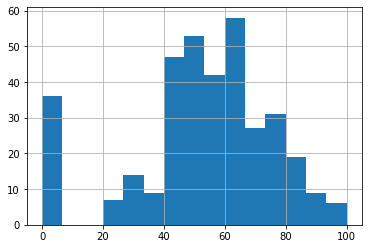

In [64]:
stud_math = stud_math.loc[stud_math.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
#  0 - is ok. Data remains the same (0 - is aceptable)
stud_math.score.hist(bins=15)

In [65]:
# How to drop the lines with unsertain data:
# determine indexes with wrong data
index_names = stud_math[stud_math['score'].isnull()].index
# use drop method to delet only rows with data out of the scope and common sence
stud_math.drop(index_names, inplace=True)
check_non_digit(stud_math.score)

0 empty lines in the column
50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     28
70.0     27
40.0     24
45.0     23
80.0     16
30.0     14
90.0      9
35.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64
358 Total numbers


## Correlation analysis

In [66]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      358 non-null    object 
 1   sex         358 non-null    object 
 2   age         358 non-null    int64  
 3   address     344 non-null    object 
 4   famsize     336 non-null    object 
 5   pstatus     322 non-null    object 
 6   medu        355 non-null    float64
 7   fedu        335 non-null    float64
 8   mjob        342 non-null    object 
 9   fjob        324 non-null    object 
 10  reason      341 non-null    object 
 11  guardian    328 non-null    object 
 12  traveltime  330 non-null    float64
 13  studytime   353 non-null    float64
 14  failures    339 non-null    float64
 15  schoolsup   349 non-null    object 
 16  famsup      324 non-null    object 
 17  paid        321 non-null    object 
 18  activities  344 non-null    object 
 19  nursery     343 non-null    o

In [ ]:
plots = stud_math[['age', 'medu', 'fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health',
                   'failures', 'absences', 'score']].copy()
sns.pairplot(stud_math, kind='scatter')

In [ ]:
stud_math.corr()

In [ ]:
sns.heatmap(stud_math.corr(), cmap='Blues')

In [ ]:
# Let's look at the sorted values of the parameters correlation with the score:
stud_math.corr().score.sort_values()

Conclusion: Failures and medu have highest correlation to the score (> +/- 0.2),  the age, goout, studytime, fedu have correlation >= +/- 0.1. (granular column was removed from the beggining). Famrel, absences, freetime, health, traveltime have very low correlation with the score.

## Analysis of nominal parameters

####   Columns with nominal or parametric data
'school','sex', 'address', 'famsize', 'pstatus',
'mjob', 'fjob', 'reason', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
'internet', 'romantic'

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

### Conclusions:

1 school — has no influence on the score, can be removed from the data

2 sex — ipmortant, 'must have' for further modeling

3 age — has some correlation with the score. It is better to keep it for further modeling.

4 address — important for further modeling (urban students have better results in math)

5 famsize — not important for math score. Can be removed.

6 Pstatus — сnot important for math score. Can be removed.

7 Medu — is important for further modeling.

8 Fedu — has a lower correlation than medu, but it is better to keep for further modeling.

9 Mjob — is important for further modeling.

10 Fjob — can be removed.

11 reason — there is no correlation or any dependence between the score and the reason. Can be removed.

12 guardian — removed from the beginning. The column is the same as studytime. 

13 traveltime — Correlation is very low.

14 studytime — has some correlation, it's better to keep for further modeling.

15 failures — has the highest correlation with the score.  -0.329883. More failures --> math score=)goes down.

16 schoolsup — boxplot shows some dependence, but tests did not recognize any statistical pieces of evidence to keep this data in the model

17 famsup — remove, as there is no evidence of any correlation.

18 paid — important for further modeling

19 activities — remove, no evidence.

20 nursery — remove, no evidence.

21 higher — important, has some influence on the score.

22 internet — remove, no evidence.

23 romantic — important.

24 famrel — very low correlation

25 freetime — very low correlation.

26 goout — can be kept as there is some correlation with the score.

27 health — very low correlation.

28 absences — very low correlation.

29 score - ☺️ keep!

I. Most important parameters: 'sex', 'age', 'address','medu', 
                           'fedu', 'mjob', 'studytime', 'failures', 
                           'paid', 'higher', 'romantic', 'goout','score',


II. Low correlation parameters: 'famrel', 'absences', 'freetime', 'health', 'traveltime'

III. Data quality: Empty data was 0 only for the first three columns: school, age, sex. There were several columns with outliers. 

IV. Correlation conclusions:

1) Correlation between the levels of education of the parents is 0.63. Looks like very true data for families.

2) Negative correlation between Age and mother and father education (medu and fedu) means that younger students have more educated parents.

3) Older students have more failures, as correlation is positive

4) Older students go out more frequently (or spend more time with their friends) - looks very socially proved.

5) Negative (very small correlation) between age and health condition is very interesting.

6) Also, older students miss more lessons.

7) Kids with more educated mothers and fathers (younger students) spend less time to reach school. (either traveling by car or houses are located nearby the school?)

8) Students with more educated parents have fewer failures at school.

9) Students with more educated parents have better math scores.

10)Negative correlation between Studytime and traveltime can be explained by the fact that probably students has to spend more time traveling rather than studying.

11) Also the same story with the freetime. Kids have to spend more time studying, as a consequence, they have less free time. It is proved by the negative correlation between free time and study time.

12) Correlation between travel time and the score is negative but very small. Look like kids who spend more time getting school are getting a lower score on math. (Again.. statistics shows that more educated families lives closer (or driving) to the school and spend more time to study)

13) Level of mother education has a higher correlation with the study time than fathers level of education. 

14) Students spending more time studying are getting better math results and fewer failures. There is a negative correlation between studytime and failures)

15)Students spending more time studying has a worse health condition. (Probably it is about sports activity shortage=))

16) Correlation between father education and failures is higher than with mother education.

17) Students with worse health conditions have more failures. Correlation >0.

18) Family education level (moms and dads) has a negative correlation with the famrelation data. Woe from wits.🎓

19) Famrel and freetime and health data have a positive correlation. It is very interesting: a good relationship at home gives more freetime to students, and they feel better, their health is better, actually.

20) better health --> fewer absences. But correlation is very low, probably due to the age level. (I suppose for people  > 65 correlation would be much higher.)

21) Absence column has the biggest correlation with go out and age and freetime. This is explained by the social activity increase with age

V. Boxplot analysis:

1) There is no big difference between the two schools from the dataset. - Confirmed by the test. 

2) math score is a matter of sex: boys get a higher scores than girls. - COnfirmed by the test.

3) Urban students have better results in math. Based on the data of travel time it is possible to assume that the schools are located in the city, but there are students from the villages.

4) Family size is not an important factor for the math score.

5) Parents' status (together or not) is not important directly for the math score.

6) It is a quite interesting fact that kids with moms from the health department and dads - teachers have better math score.

7) There is no dependence between the reason for choosing this school and the math score. Probably, math is not a special area of interest of the school, as the mean score for the reason - 'course' is lower than others.

8) Students having school support has a lower score. (Looks very truly, as schools normally try to help their students with complicated subjects, and if there is no problem and score is ok - then no support is needed)

9) Famsup is not important for math scores. as well as additional courses (paid).

10) Also there is no correlation between additional activities of the students,  nursery (kid garden), and the score.

11) Wish to get a higher level of education probably is a good motivator to get better marks on math. Current data prove this assumption.

12) Having an internet result in a better math score based on the boxplot. But statistically, there is no evidence of such a conclusion.

13) Finally, if you are in love there is no place for math. It is proved, that students in romantic relationships have lower math scores. It would be very interesting to see how many girls or boys are in romantic relationships.=)Next time!


In [ ]:
stud_math_for_model = stud_math.loc[:, ['sex', 'age', 'address', 'medu',
                                        'fedu', 'mjob', 'studytime', 'failures',
                                        'paid', 'higher', 'romantic', 'goout', 'score',
                                        'famrel', 'absences', 'freetime', 'health', 'traveltime']]

In [ ]:
stud_math_for_model.head(10)